In [1]:
import pytumblr
import json
import networkx as nx 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Authenticate via API Key
client = pytumblr.TumblrRestClient('x2jxd8Iar3OpZAm7Q7FvPHSrPOanJjpmgDLSegiTv4t0TLuyaf')

API Key

OAuth Consumer Key:  x2jxd8Iar3OpZAm7Q7FvPHSrPOanJjpmgDLSegiTv4t0TLuyaf
    
Secret Key:  gEeo7S1FerlYLXHa8No4O9sKrS0lrj3w8I1d6hcLWjX2nWFfjx

Use this page to enter the keys and select Python to see all the sample code in python.
https://api.tumblr.com/console/calls/user/info

You can also gain your own API by register an application using your Tumblr account.
https://www.tumblr.com/oauth/register

In [2]:
#trying to find all the posts contain certain tag which are repostsed from other's blog.
useful_posts = []
last_timestamp = 1676600000 
time_of_run = 0; #indicate how many times you want to run this program, everytime extract 20 posts.
target_tag = 'diet'

while (time_of_run < 2):
    posts = client.tagged(target_tag, before=last_timestamp)
    
    if len(posts) == 0:
        break
        
    for post in posts:    
        user_id = post["blog_name"]
        post_id = post["id"]
        exact_client = client.posts(user_id, id=post_id, reblog_info=True) #set "showing the reblog_info" to be true.
        if "posts" in exact_client: #Check whether this client has ever posted any post.
            exact_post = exact_client["posts"][0] #gain access to the post contains in the list.
            if ('reblogged_from_id' in exact_post):
                print(exact_post)
                useful_posts.extend(exact_post) 
    
    #set the timestamp to the last post in this loop minus one
    last_timestamp = posts[-1]["timestamp"] - 1
    
    time_of_run += 1
    
#check if the program is over.
print("done")

done


In [3]:
useful_posts

[]

In [4]:
#find all the posts of a certain user which are repostsed from other's blog.
#this is used to store the userful posts (useful means this is a re-blog/re-post).
useful_posts = []

In [5]:
user_id = 'wtoreoreo'
exact_client = client.posts(user_id, reblog_info=True)
if ('posts' in exact_client):
    for exact_post in exact_client['posts']:
        if ('reblogged_from_id' in exact_post):
            useful_posts.append(exact_post) 

In [6]:
useful_posts

[{'type': 'text',
  'is_blocks_post_format': False,
  'blog_name': 'wtoreoreo',
  'blog': {'name': 'wtoreoreo',
   'title': 'x',
   'description': 'okay',
   'url': 'https://www.tumblr.com/blog/view/wtoreoreo',
   'uuid': 't:pPWEbdpnF2NJPfA3xkZZMQ',
   'updated': 1682004252,
   'tumblrmart_accessories': {},
   'can_show_badges': True},
  'id': 715133291241619456,
  'id_string': '715133291241619456',
  'is_blazed': False,
  'is_blaze_pending': False,
  'can_blaze': False,
  'post_url': 'https://www.tumblr.com/blog/view/wtoreoreo/715133291241619456',
  'slug': 'empty-cal0ries-starving-gordita',
  'date': '2023-04-20 15:24:12 GMT',
  'timestamp': 1682004252,
  'state': 'published',
  'format': 'html',
  'reblog_key': 'QK2F1x4K',
  'tags': [],
  'short_url': 'https://tmblr.co/Zm5n8RdigV1-Wq00',
  'summary': 'idk if those\xa0“spells” work but………. somehow it’s working, is it a placebo? anyways 10 lbs weight loss spell!\n  like to charge\n...',
  'should_open_in_legacy': False,
  'recommended

In [7]:
df = pd.json_normalize(useful_posts) #useful_post is in a list  

In [9]:
df

,type,is_blocks_post_format,blog_name,id,id_string,is_blazed,is_blaze_pending,can_blaze,post_url,slug,...,display_avatar,blog.name,blog.title,blog.description,blog.url,blog.uuid,blog.updated,blog.can_show_badges,reblog.comment,reblog.tree_html
0,text,False,wtoreoreo,715133291241619456,715133291241619456,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/715...,empty-cal0ries-starving-gordita,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a href=""https://empty-cal0ries.tumblr.com/..."
1,text,True,wtoreoreo,715133262575566848,715133262575566848,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/715...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://thin-t..."
2,text,True,wtoreoreo,715132961595457536,715132961595457536,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/715...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
3,text,True,wtoreoreo,714691976397766656,714691976397766656,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/714...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
4,text,True,wtoreoreo,714071676261908482,714071676261908482,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/714...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
5,text,True,wtoreoreo,713883490215690240,713883490215690240,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/713...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
6,text,True,wtoreoreo,713882820984061952,713882820984061952,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/713...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
7,text,True,wtoreoreo,713138038337830912,713138038337830912,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/713...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."
8,text,False,wtoreoreo,712881838499266560,712881838499266560,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/712...,jak-pozbyć-się-jedzenia,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""http://brzydul..."
9,text,True,wtoreoreo,712878441215754240,712878441215754240,False,False,False,https://www.tumblr.com/blog/view/wtoreoreo/712...,,...,True,wtoreoreo,x,okay,https://www.tumblr.com/blog/view/wtoreoreo,t:pPWEbdpnF2NJPfA3xkZZMQ,1682004252,True,,"<p><a class=""tumblr_blog"" href=""https://www.tu..."


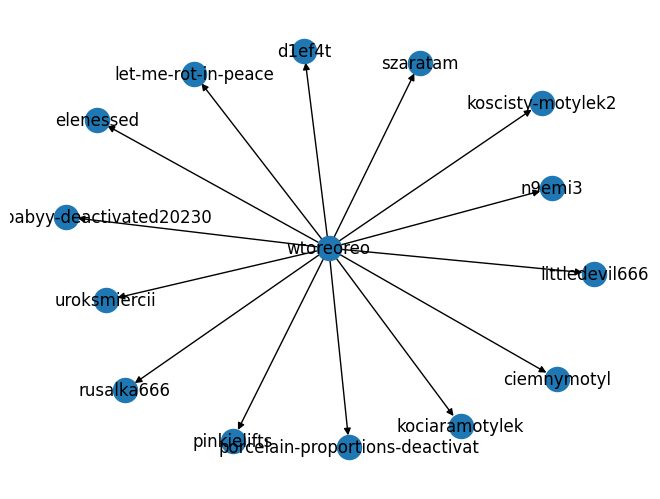

In [7]:
#the middle is the user id of the posts we scrutinized, the others are the user id of the reblogs acctual owner.
G = nx.from_pandas_edgelist(df, source='blog_name', target='reblogged_from_name', create_using=nx.DiGraph)

nx.draw(G, with_labels = True)

In [8]:
# count the time other tags occur in the posts containing target tag (eg. ed but not sheeran).
target_tag = 'ed but not sheeran'
posts = client.tagged(target_tag, before=1676601000)
hashtags = {}
for post in posts:
    for hashtag in post["tags"]:
        if (hashtag not in hashtags):
            hashtags[hashtag] = 1
        else:
            hashtags[hashtag] += 1

pd.Series(hashtags)

disordered eating thoughts     5
tw ana diary                  15
anor3x14                       9
ana trigger                    9
ed but not sheeran            20
                              ..
bing3 eating                   1
tw ana trigger                 1
tw ana thoughts                2
skinnii                        2
sewerslide                     2
Length: 134, dtype: int64

In [11]:
#this is used to store the relation between harmful hashtags and harmless hashtags
hashtags = []

#relatively harmless tag is harmless_tag, harmful_tags means those pro-ed tags. 
harmless_tag = 'diet'
harmful_tags = ['ana', 'ed', 'anorexia']

posts = client.tagged(harmless_tag, before=1676601000)

for post in posts:
    for hashtag in post["tags"]:
        for harmful_tag in harmful_tags:
            if harmful_tag in hashtag.split():
                hashtags.append({
                    "target_tag" : harmless_tag,
                    "tag" : hashtag
                })

In [14]:
hashtags

[{'target_tag': 'diet', 'tag': 'tw ed diet'},
 {'target_tag': 'diet', 'tag': 'tw ana diary'},
 {'target_tag': 'diet', 'tag': 'ana dairy'},
 {'target_tag': 'diet', 'tag': 'ed journal'},
 {'target_tag': 'diet', 'tag': 'tw ed'},
 {'target_tag': 'diet', 'tag': 'tw ed diet'},
 {'target_tag': 'diet', 'tag': 'ana'},
 {'target_tag': 'diet', 'tag': 'pro ana recipe'},
 {'target_tag': 'diet', 'tag': 'tw ana diet'}]

In [12]:
df = pd.json_normalize(hashtags)


In [13]:
df

,target_tag,tag
0,diet,tw ed diet
1,diet,tw ana diary
2,diet,ana dairy
3,diet,ed journal
4,diet,tw ed
5,diet,tw ed diet
6,diet,ana
7,diet,pro ana recipe
8,diet,tw ana diet


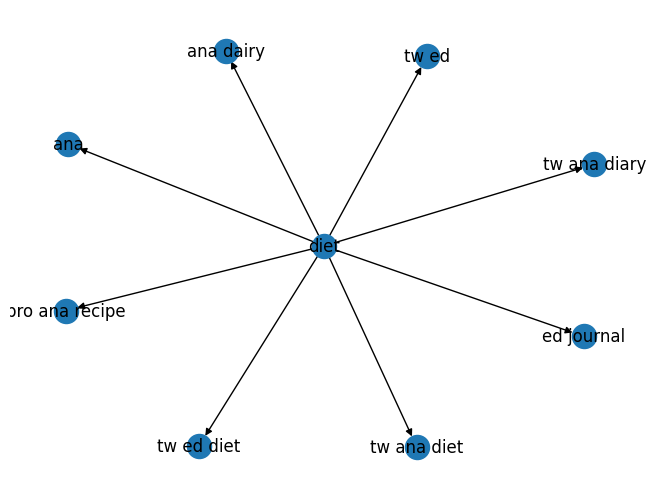

In [10]:

G = nx.from_pandas_edgelist(df, source='target_tag', target='tag', create_using=nx.DiGraph)
nx.draw(G, with_labels = True)